Solution to exercise 1

In [1]:
from pymoo.problems.multi.zdt import ZDT5
import numpy as np
import matplotlib.pyplot as plt

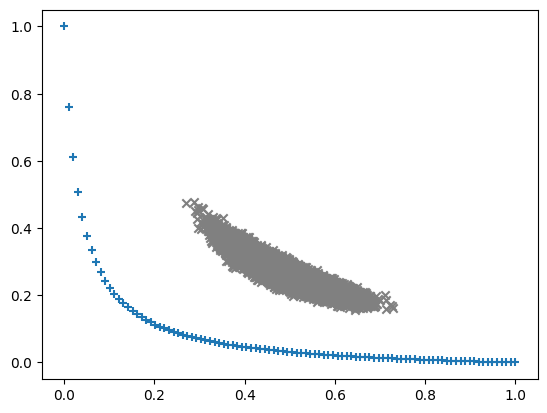

In [2]:
problem = ZDT5()

N = 100000
Y = np.zeros((N, 2))
for i in range(N):
    x = np.random.rand(problem.n_var) * (problem.xu - problem.xl) + problem.xl
    Y[i] = problem.evaluate(x)

plt.scatter(Y[:, 0], Y[:, 1], marker="x", c="gray")

Z = problem.pareto_front()
plt.scatter(Z[:, 0], Z[:, 1], marker="+")

plt.show()

Solution to exercise 2

In [3]:
def dominates(u,v):
    return(u<=v).all() and (u<v).any()

In [4]:
sol1 = np.array([2,1])
sol2 = np.array([4,2])
sol3 = np.array([1,3])
sol4 = np.array([3,4])

print(dominates(sol1, sol2), dominates(sol2, sol1))
print(dominates(sol3, sol4), dominates(sol4, sol3))
print(dominates(sol3, sol2), dominates(sol2, sol3))

True False
True False
False False


In [5]:
assert dominates(sol1, sol2) == True and dominates(sol2, sol1) == False
assert dominates(sol3, sol4) == True and dominates(sol4, sol3) == False
assert dominates(sol3, sol2) == False and dominates(sol2, sol3) == False

In [6]:
def updateArchive(A, y):
    Idxs = [i for i in range(len(A)) if dominates(y, A[i])][::-1]
    for idx in Idxs:
        A.pop(idx)
        
    for a in A:
        if dominates(a, y):
            return A
        
    A.append(y)
    return A

Text(0, 0.5, 'Objective $f_2$ (minimise)')

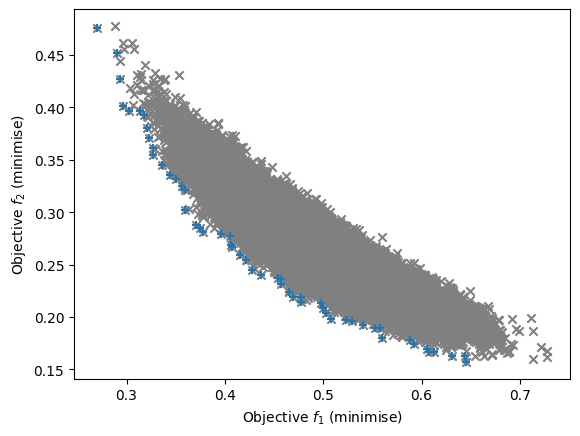

In [7]:
# Initialise an empty archive
archive=[]

# Add each of the 10,000 random samples to the archive.
for i in range(N):
    archive=updateArchive(archive,Y[i,:])

# Convert the archive to a Numpy array and plot it.
Z=np.array(archive)
plt.figure()
plt.scatter(Y[:,0],Y[:,1],marker="x",c="gray")
plt.scatter(Z[:,0],Z[:,1],marker="+")
plt.xlabel("Objective $f_1$ (minimise)")
plt.ylabel("Objective $f_2$ (minimise)")


Solution to exercise 3

In [38]:
class BitFlipMutation:
    def mutate(self,x):
        idx=np.random.randint(x.shape[0])
        xp=x.copy()
        xp[idx]=abs(1-x[idx])
        return xp

class BlockFlipMutation:
    def mutate(self, x):
        idx, jdx=sorted(np.random.randint(0,x.shape[0],2))
        xp=x.copy()
        xp[idx:jdx]=abs(1-x[idx:jdx])
        return xp

class RandomMutation:
    def mutate(self,x):
        return np.random.randint(0,2,x.shape[0])

def evolve(x, y,  mutation, compare, A):
    xp=mutation.mutate(x)
    yp=problem.evaluate(xp)
    A=updateArchive(A,yp)

    if not compare(y, yp):
        return xp, yp, A
    return x, y, A

def optimise(D, mutation, ngens, compare):

    x = np.random.rand(problem.n_var) * (problem.xu - problem.xl) + problem.xl
    y = problem.evaluate(x)
    
    archive=[]
    
    for gen in range (ngens):
        x, y, archive=evolve(x, y, mutation, compare, archive)
        
    return x, y, archive

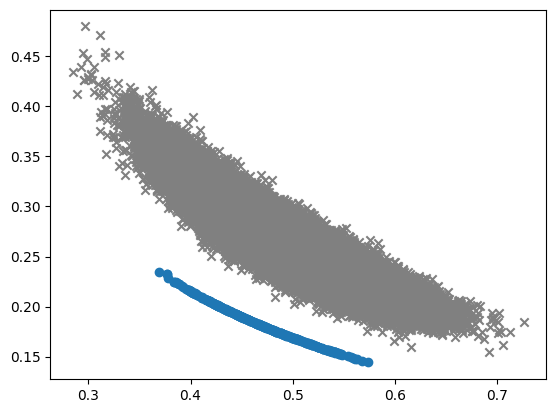

In [39]:
# Optimise ZDT5

zdt5=ZDT5()

x, y, archive=optimise(80, BitFlipMutation(), 1000, dominates)

# Convert the archive to a numpy array and plot it (and the random samples)

A=np.array(archive)
plt.figure()
plt.scatter(A[:,0], A[:,1])
plt.scatter(Y[:,0], Y[:,1], marker="x", c="gray")
plt.savefig("zdt5_2.png", bbox_inches="tight")

Solution to exercise 4

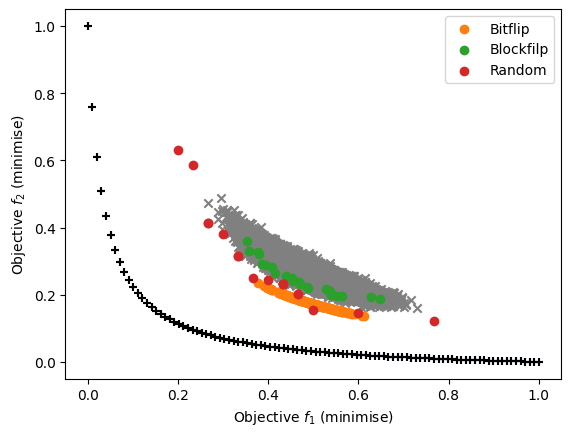

In [46]:
mutstrs = ["Bitflip", "Blockfilp", "Random"]
muts = [BitFlipMutation(),BlockFlipMutation(), RandomMutation()]

plt.figure()
plt.scatter(Z[:,0], Z[:,1], marker="+")
plt.scatter(Y[:,0], Y[:,1], marker="x", c="gray")

for mut, mutstr in zip(muts, mutstrs):
    x, y, archive = optimise(80, mut, 1000, dominates)
    A = np.array(archive)
    plt.scatter(A[:,0], A[:,1], label=mutstr)
    
PF=problem.pareto_front()

plt.scatter(PF[:,0],PF[:,1],marker="+", c="black")
plt.legend(loc=1)
plt.xlabel("Objective $f_1$ (minimise)")
plt.ylabel("Objective $f_2$ (minimise)")
plt.savefig("zdt5_3.png", bbox_inches="tight")
plt.show()